In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

[ 1. 12. 16. 18.]


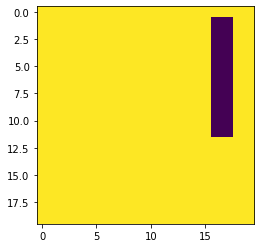

In [3]:
# пример данных

with h5py.File("rect_data.h5", "r") as f:
    test_x = f["test"][42]
    test_y = f["test_bboxes"][42]
    plt.imshow(test_x)
    print(test_y)

In [27]:
def iou(bbox1: list, bbox2: list) -> float:
    
    min_row1, max_row1, min_col1, max_col1 = bbox1
    min_row2, max_row2, min_col2, max_col2 = bbox2
    
    area1 = (max_row1 - min_row1) * (max_col1 - min_col1)
    area2 = (max_row2 - min_row2) * (max_col2 - min_col2)
    
    intersection_area = 0.0
    
    if min_col2 <= max_col1 and max_row2 >= min_row1:
        intersection_area = (max_col1 - min_col2) * (max_row2 - min_row1)
    elif min_col1 <= max_col2 and max_row1 >= min_row2:
        intersection_area = (max_col1 - min_col2) * (max_row2 - min_row1)
    
    return intersection_area / (area1 + area2 - intersection_area)

In [30]:
bbox1 = [0, 10, 0, 10]
bbox2 = [0, 10, 1, 10]
bbox3 = [20, 30, 20, 30]
bbox4 = [5, 15, 5, 15]

assert iou(bbox1, bbox1) == 1.0
assert iou(bbox1, bbox2) == 0.9
assert iou(bbox1, bbox3) == 0.0

In [31]:
assert round(iou(bbox1, bbox4), 2) == 0.14

AssertionError: 